# Introduction

## About the data set

Data description and source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Excerpt from the data description:

> Mammography is the most effective method for breast cancer screening
> available today. However, the low positive predictive value of breast
> biopsy resulting from mammogram interpretation leads to approximately
> 70% unnecessary biopsies with benign outcomes. To reduce the high
> number of unnecessary breast biopsies, several computer-aided diagnosis
> (CAD) systems have been proposed in the last years.These systems
> help physicians in their decision to perform a breast biopsy on a suspicious
> lesion seen in a mammogram or to perform a short term follow-up
> examination instead.
> This data set can be used to predict the severity (benign or malignant)
> of a mammographic mass lesion from BI-RADS attributes and the patient's age.
> It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes
> together with the ground truth (the severity field) for 516 benign and
> 445 malignant masses that have been identified on full field digital mammograms
> collected at the Institute of Radiology of the
> University Erlangen-Nuremberg between 2003 and 2006.
> Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign)
> to 5 (highly suggestive of malignancy) assigned in a double-review process by
> physicians. Assuming that all cases with BI-RADS assessments greater or equal
> a given value (varying from 1 to 5), are malignant and the other cases benign,
> sensitivities and associated specificities can be calculated. These can be an
> indication of how well a CAD system performs compared to the radiologists.

## My goals

I've done some data analysis and visualization with matplotlib. First, I'd like to learn a few visualizations with seaborn. Second, I'd like to explore some machine learning algorithms in scikit-learn.

    
## Some background information on BIRADS

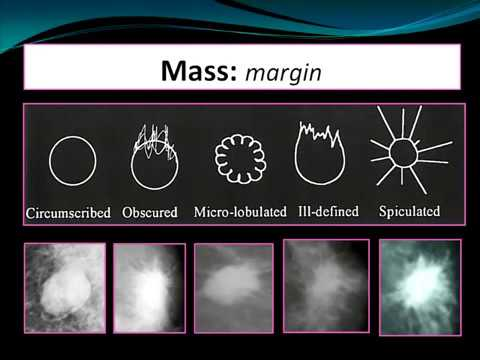

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("zDg_5vmNLaw")

In [2]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandas.tools.plotting import scatter_matrix
import seaborn

# Import and clean data

I glanced at the data file, and saw that there is no header row, and missing values are denoted with '?'.

In [3]:
header = ['BIRADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
data = pandas.read_csv('mammographic_masses.data', names=header, na_values=['?'])
data.head()

,BIRADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [4]:
data.dtypes

BIRADS      float64
Age         float64
Shape       float64
Margin      float64
Density     float64
Severity      int64
dtype: object

From the data description, we know we have these possible values for the attributes:

1. BI-RADS assessment: 1 to 5 (ordinal)  
2. Age: patient's age in years (integer)
3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. Severity: benign=0 or malignant=1 (binominal)

In [5]:
# let's check data integrity of BiRads
data.BIRADS.value_counts()

4.0     547
5.0     345
3.0      36
2.0      14
6.0      11
0.0       5
55.0      1
Name: BIRADS, dtype: int64

In our BIRADS column, we know the values should be in the range 1 - 5, however, we have some abnormal data to clean up.
So, let's exclude the rows that are not 1 - 5.

In [6]:
data = data[(data.BIRADS > 0) & (data.BIRADS < 6)]
data.BIRADS.value_counts()

4.0    547
5.0    345
3.0     36
2.0     14
Name: BIRADS, dtype: int64

In [7]:
# let's check Shape values are 1 - 4
data.Shape.value_counts()

4.0    389
1.0    223
2.0    209
3.0     92
Name: Shape, dtype: int64

In [8]:
# let's check Margin values are 1 - 5
data.Margin.value_counts()

1.0    355
4.0    274
5.0    133
3.0    110
2.0     24
Name: Margin, dtype: int64

In [9]:
# check Density values are 1 - 4
data.Density.value_counts()

3.0    782
2.0     58
1.0     15
4.0     11
Name: Density, dtype: int64

In [10]:
# check Severity values are 0 or 1
data.Severity.value_counts()

0    510
1    432
Name: Severity, dtype: int64

# Exploration

Now that we've cleaned up the data, let's explore a bit.

In [11]:
data.describe()

,BIRADS,Age,Shape,Margin,Density,Severity
count,942.000000,937.000000,913.000000,896.000000,866.000000,942.000000
mean,4.298301,55.393810,2.708653,2.783482,2.911085,0.458599
std,0.612635,14.498662,1.244506,1.570680,0.375790,0.498548
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1128a8da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115ec59e8>]], dtype=object)

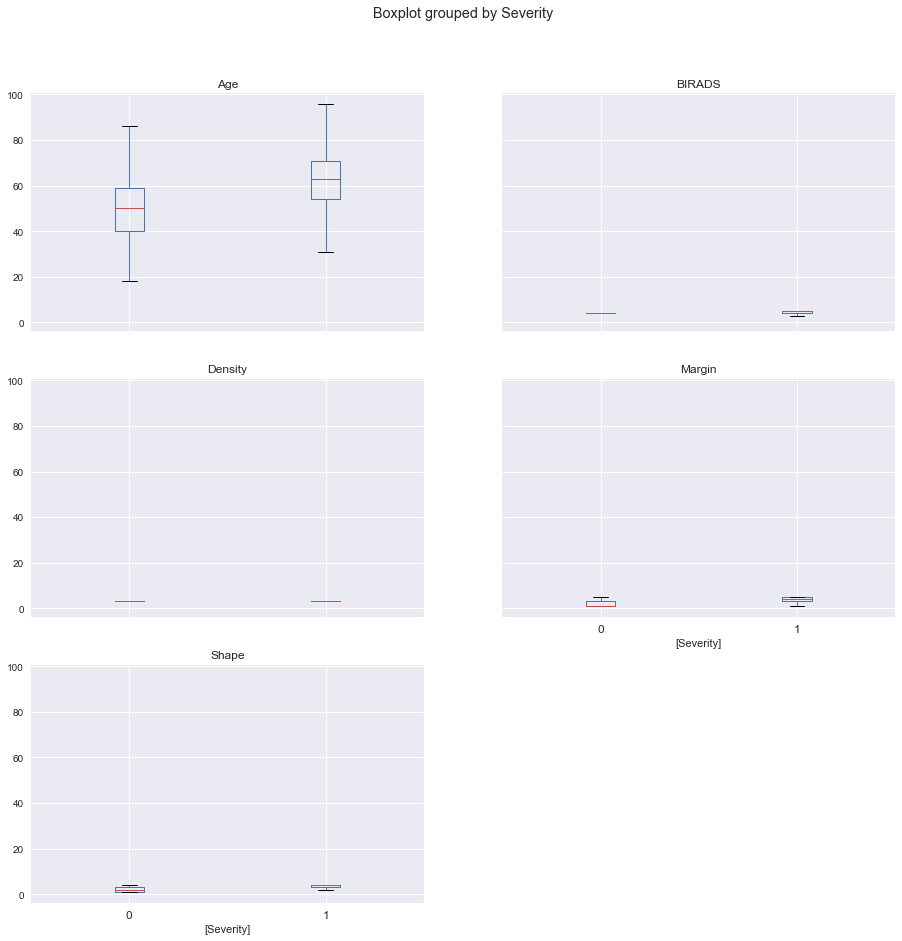

In [12]:
data.boxplot(by='Severity', grid=True, figsize=(15,15))

These boxplots all have the same y-scale, which is not so useful. We'll try plotting this in Seaborn as well as making a separate boxplot for Age feature, as it's a much different scale.

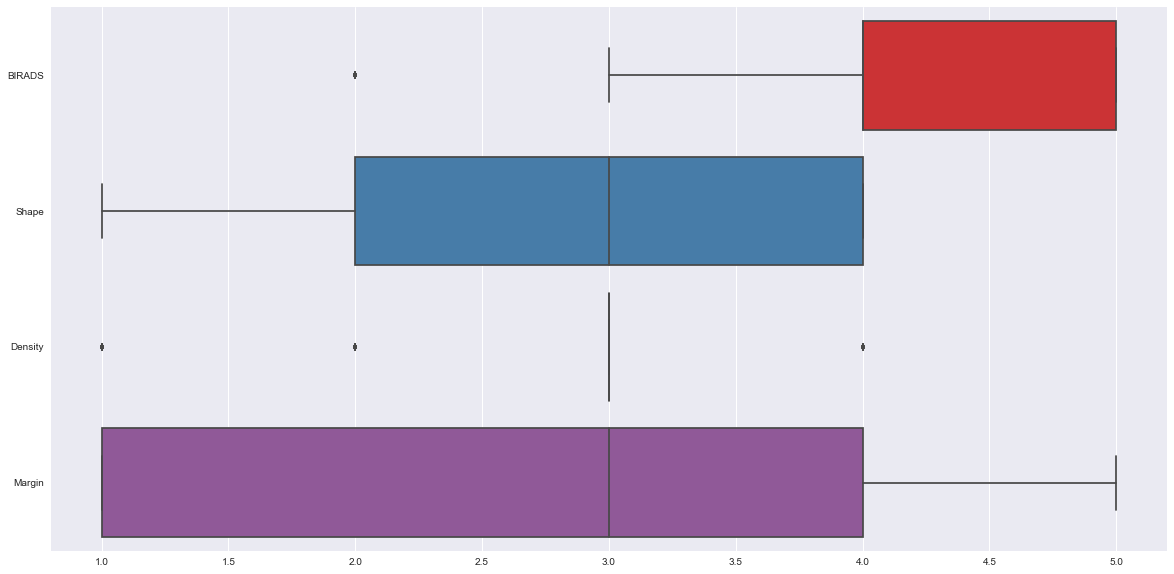

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
seaborn.boxplot(data=data[['BIRADS', 'Shape', 'Density', 'Margin']], orient="h", palette="Set1")

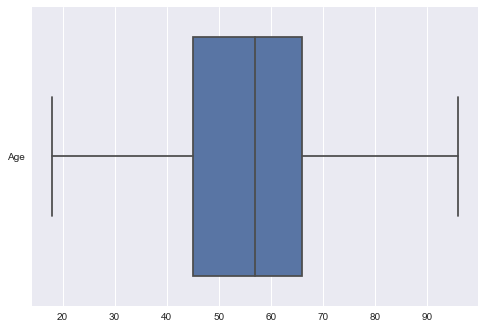

In [14]:
seaborn.boxplot(data=data[['Age']], orient="h")

Since Severity is our target or outcome, what if we partition the Severity by hue. I picked Margin, but we could do this for the other features.

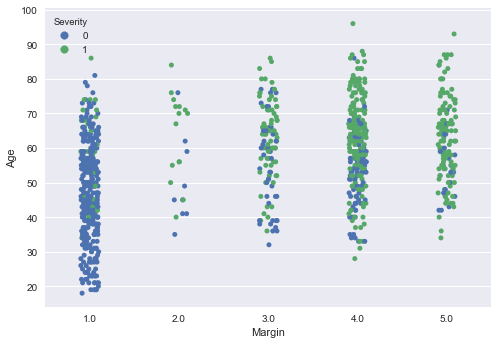

In [15]:
seaborn.stripplot(x=data.Margin, y=data.Age, hue=data.Severity, jitter=True)

Histograms are another way to get a feel for the data and it's distribution:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116f78940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115df90b8>]], dtype=object)

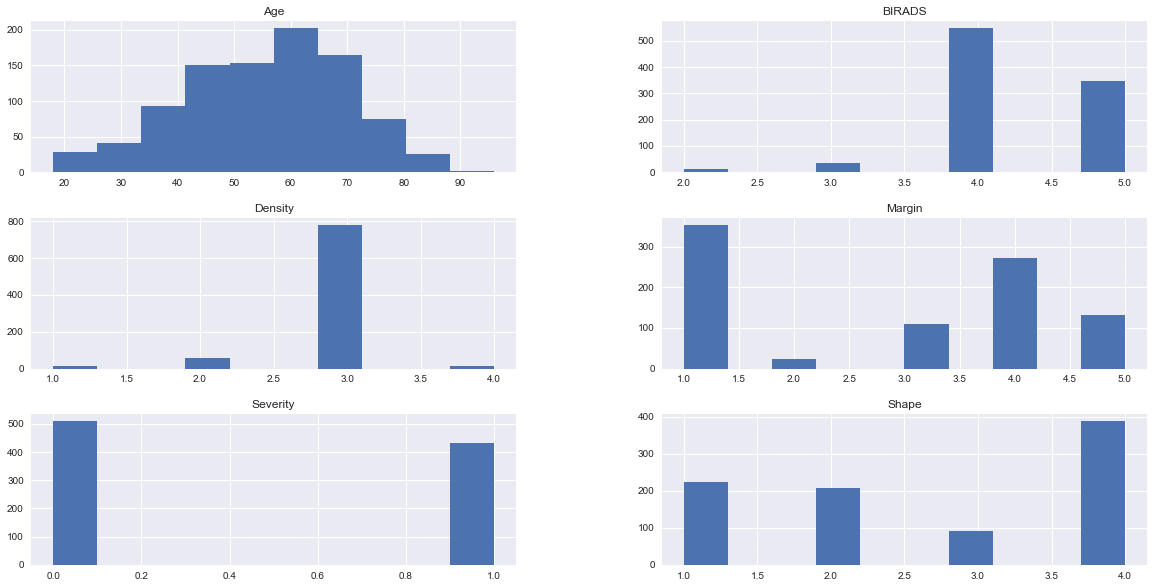

In [16]:
data.hist(figsize=(20,10))

Let's look at histograms segmented by Severity. The first set of plots are for Severity=0, second half are for Severity=1.

Severity
0    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
dtype: object

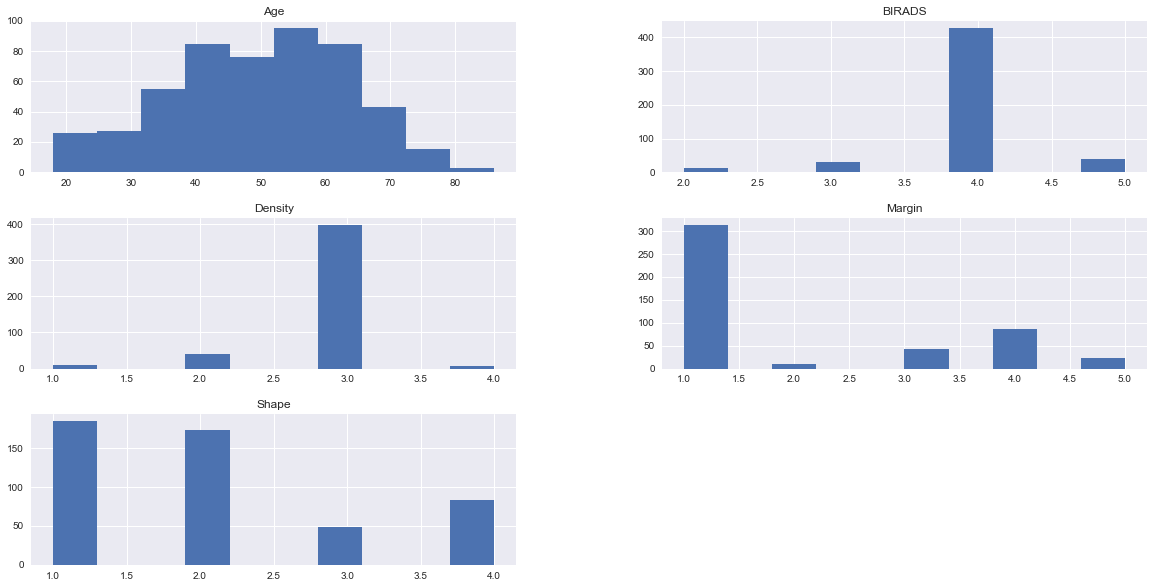

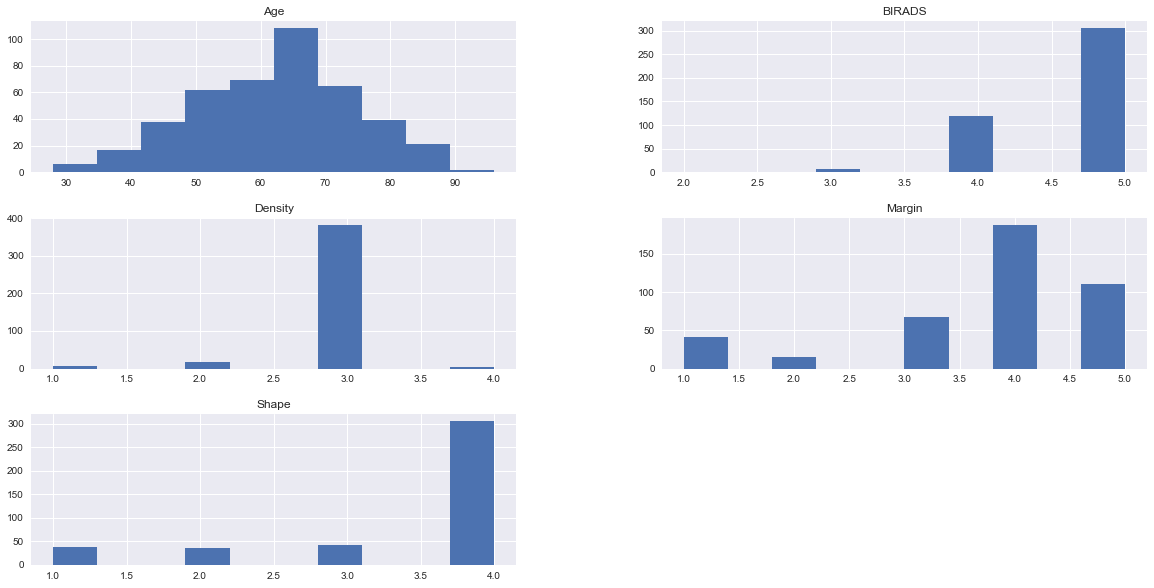

In [17]:
data.groupby('Severity').hist(figsize=(20,10))

It might be easier to see this separation with overlays:

Severity
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Shape, dtype: object

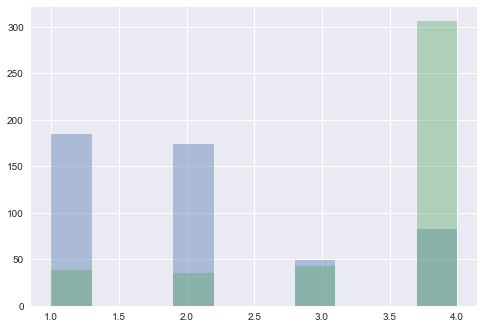

In [18]:
data.groupby('Severity').Shape.hist(alpha=0.4)

Severity
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

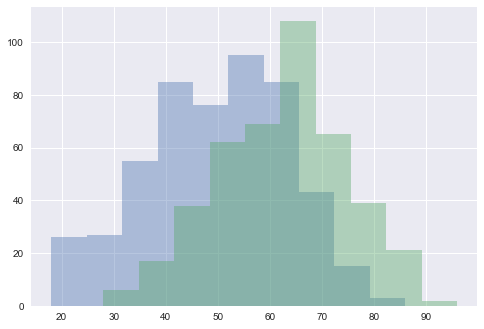

In [19]:
data.groupby('Severity').Age.hist(alpha=0.4)

Severity
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: BIRADS, dtype: object

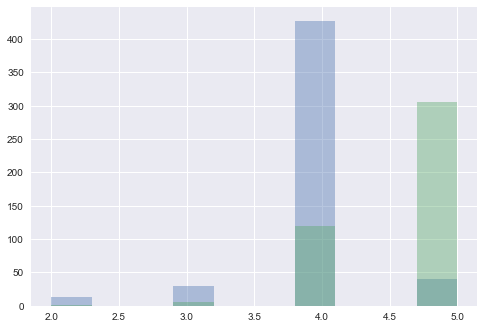

In [20]:
data.groupby('Severity').BIRADS.hist(alpha=0.4)

Severity
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Margin, dtype: object

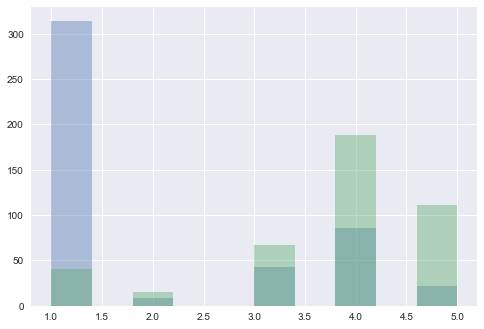

In [21]:
data.groupby('Severity').Margin.hist(alpha=0.4)

Severity
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Density, dtype: object

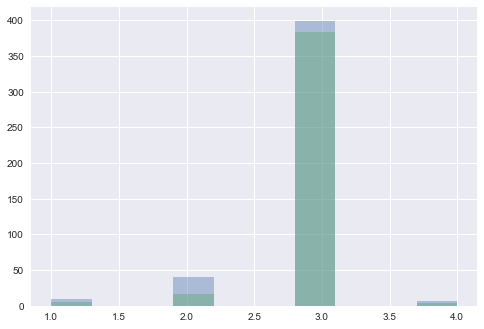

In [22]:
data.groupby('Severity').Density.hist(alpha=0.4)

Another way to detect possible relationships is to look at pearson correlation:

In [23]:
correlation = data.corr()
correlation

,BIRADS,Age,Shape,Margin,Density,Severity
BIRADS,1.000000,0.347814,0.496042,0.509610,0.098828,0.585002
Age,0.347814,1.000000,0.361598,0.411170,0.032892,0.433852
Shape,0.496042,0.361598,1.000000,0.742494,0.077808,0.561566
Margin,0.509610,0.411170,0.742494,1.000000,0.109155,0.575956
Density,0.098828,0.032892,0.077808,0.109155,1.000000,0.070538
Severity,0.585002,0.433852,0.561566,0.575956,0.070538,1.000000


Looks like Density and Age are not so strongly correlated, which is what we also with the histograms with overlays by Severity. We can better visualize with a heatmap:

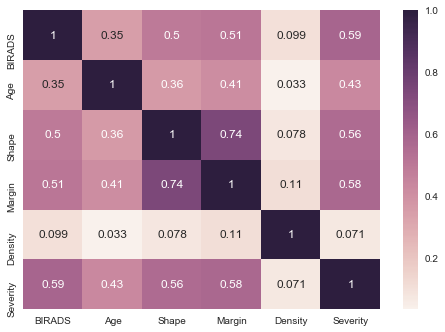

In [24]:
seaborn.heatmap(correlation, annot = True)

# Machine Learning algorithms

My goal is to try out a few scikit libraries, so let's try out a few things.

## Impute missing data

Before we can start training any models, it is important to realize that the classifiers will not work if there is any missing data. Therefore, we can try two approaches:
1. Drop the missing data.
2. Impute missing data.

Let's first try to impute the missing data with scikit-learn's Imputer class.

In [25]:
from sklearn.preprocessing import Imputer

# since our features are integer values, I picked median as the strategy, over mean
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
features_all_rows = data[['BIRADS', 'Age', 'Shape', 'Margin', 'Density']]
features_all_rows

,BIRADS,Age,Shape,Margin,Density
0,5.0,67.0,3.0,5.0,3.0
1,4.0,43.0,1.0,1.0,NaN
2,5.0,58.0,4.0,5.0,3.0
3,4.0,28.0,1.0,1.0,3.0
4,5.0,74.0,1.0,5.0,NaN
5,4.0,65.0,1.0,NaN,3.0
6,4.0,70.0,NaN,NaN,3.0
7,5.0,42.0,1.0,NaN,3.0
8,5.0,57.0,1.0,5.0,3.0
9,5.0,60.0,NaN,5.0,1.0


In [26]:
imputer.fit(features_all_rows)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [27]:
imputed_X = imputer.transform(features_all_rows)
imputed_X

array([[  5.,  67.,   3.,   5.,   3.],
       [  4.,  43.,   1.,   1.,   3.],
       [  5.,  58.,   4.,   5.,   3.],
       ..., 
       [  4.,  64.,   4.,   5.,   3.],
       [  5.,  66.,   4.,   5.,   3.],
       [  4.,  62.,   3.,   3.,   3.]])

In [28]:
# our target in the imputed data set:
imputed_y = data.Severity

## Drop rows with missing data

Let's also prepare data where we drop rows with missing data. Then we can compare both strategies.

In [29]:
data_subset = data.dropna()
data_subset

,BIRADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1
11,3.0,42.0,2.0,1.0,3.0,1
13,4.0,36.0,3.0,1.0,2.0,0
14,4.0,60.0,2.0,1.0,2.0,0
15,4.0,54.0,1.0,1.0,3.0,0
16,3.0,52.0,3.0,4.0,3.0,0


In [30]:
subset_X = data_subset[['BIRADS', 'Age', 'Shape', 'Margin', 'Density']]
subset_y = data_subset.Severity

## Split data

First let's split the data set into a random train and test sets.

In [31]:
from sklearn.model_selection import train_test_split

# our imputed data
X_train1, X_test1, y_train1, y_test1 = train_test_split(imputed_X, imputed_y, test_size=0.2, random_state=42)

# our data subset (dropped rows with missing data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(subset_X, subset_y, test_size=0.2, random_state=42)

## Try various classifiers

I'm going to try a list of classifiers with some default settings and see how they do.

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso

In [33]:
names = ['Nearest Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Gaussian Process',
         'Decision Tree', 
         'Random Forest', 
         'MLP Neural Network', 
         'AdaBoost',
         'Gaussian Naive Bayes',
         'Linear Discriminant Analysis',
         'Quadratic Discriminant Analysis',
         'Kernel Ridge Regression',
         'Lasso',
        ]

In [34]:
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KernelRidge(),
    Lasso(),
]

In [35]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers with the imputed data
results = {}
for name, classifier in zip(names, classifiers):
    #print(name)
    scores = cross_val_score(classifier, X_train1, y_train1, cv=10)
    #print(scores)
    results[name] = scores
for name, scores in results.items():
    print("%35s : Average Score: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

                  Nearest Neighbors : Average Score: 81.68% (+/- 8.03%)
                      Decision Tree : Average Score: 76.50% (+/- 5.26%)
                   Gaussian Process : Average Score: 80.89% (+/- 8.33%)
    Quadratic Discriminant Analysis : Average Score: 82.60% (+/- 5.44%)
               Gaussian Naive Bayes : Average Score: 82.47% (+/- 5.21%)
            Kernel Ridge Regression : Average Score: 39.01% (+/- 17.06%)
                      Random Forest : Average Score: 78.22% (+/- 6.46%)
                         Linear SVM : Average Score: 82.07% (+/- 5.54%)
                              Lasso : Average Score: 12.60% (+/- 12.68%)
                 MLP Neural Network : Average Score: 77.55% (+/- 6.93%)
                            RBF SVM : Average Score: 80.22% (+/- 9.05%)
                           AdaBoost : Average Score: 81.40% (+/- 8.34%)
       Linear Discriminant Analysis : Average Score: 83.53% (+/- 6.08%)


In [36]:
# iterate over classifiers with the subsetted data
results = {}
for name, classifier in zip(names, classifiers):
    #print(name)
    scores = cross_val_score(classifier, X_train2, y_train2, cv=10)
    #print(scores)
    results[name] = scores
for name, scores in results.items():
    print("%35s : Average Score: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

                  Nearest Neighbors : Average Score: 82.52% (+/- 3.84%)
                      Decision Tree : Average Score: 80.66% (+/- 8.80%)
                   Gaussian Process : Average Score: 82.06% (+/- 6.30%)
    Quadratic Discriminant Analysis : Average Score: 83.58% (+/- 5.92%)
               Gaussian Naive Bayes : Average Score: 83.74% (+/- 7.31%)
            Kernel Ridge Regression : Average Score: 44.69% (+/- 17.15%)
                      Random Forest : Average Score: 81.59% (+/- 7.08%)
                         Linear SVM : Average Score: 84.03% (+/- 6.72%)
                              Lasso : Average Score: 17.77% (+/- 9.40%)
                 MLP Neural Network : Average Score: 68.00% (+/- 28.58%)
                            RBF SVM : Average Score: 81.59% (+/- 6.46%)
                           AdaBoost : Average Score: 84.19% (+/- 7.22%)
       Linear Discriminant Analysis : Average Score: 85.72% (+/- 5.76%)
